**1)** Data set reference link: https://www.consumerfinance.gov/data-research/consumer-complaints/#download-the-data

File data source: https://files.consumerfinance.gov/ccdb/complaints.csv.zip

Problem statement:
Download the data from the file data source and provide possible data insights.

<ipython-input-1-4c88fe47a0d7>:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, compression='zip')


  Date received                                            Product  \
0    2024-05-16  Credit reporting or other personal consumer re...   
1    2024-05-16  Credit reporting or other personal consumer re...   
2    2024-05-04  Credit reporting or other personal consumer re...   
3    2024-05-16  Credit reporting or other personal consumer re...   
4    2024-05-16  Credit reporting or other personal consumer re...   

        Sub-product                                              Issue  \
0  Credit reporting               Incorrect information on your report   
1  Credit reporting               Incorrect information on your report   
2  Credit reporting  Problem with a company's investigation into an...   
3  Credit reporting                        Improper use of your report   
4  Credit reporting  Problem with a company's investigation into an...   

                                           Sub-issue  \
0                      Account information incorrect   
1                Infor

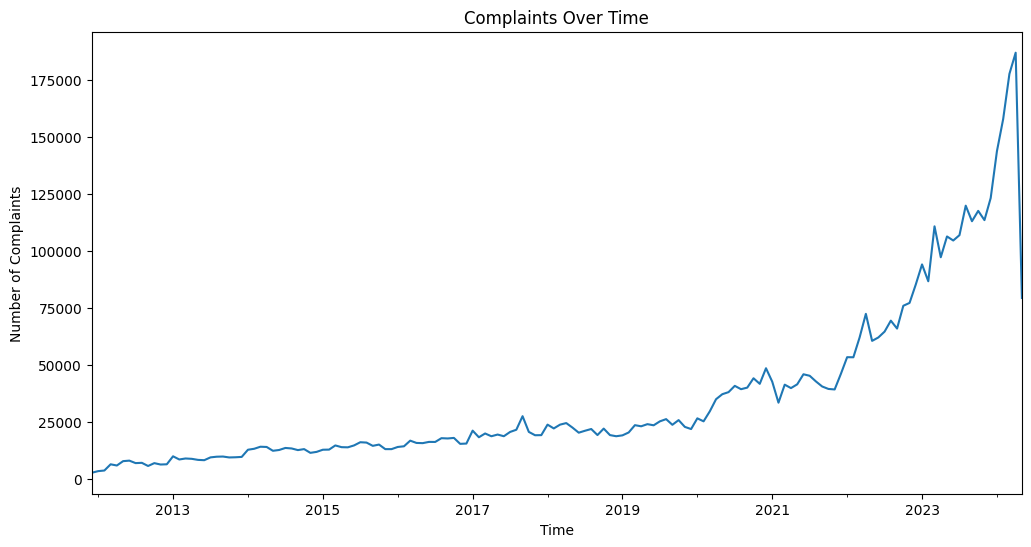

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
url = "https://files.consumerfinance.gov/ccdb/complaints.csv.zip"
df = pd.read_csv(url, compression='zip')

# Show the first few rows of the dataframe
print(df.head())

# Top 5 complaint types
top_complaints = df['Product'].value_counts().head(5)
print(top_complaints)

# Trend of complaints over time
df['Date received'] = pd.to_datetime(df['Date received'])
complaints_over_time = df.groupby(df['Date received'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
complaints_over_time.plot()
plt.title('Complaints Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Complaints')
plt.show()

**Insights**

Here’s what we can observe:

Stable Period (2013 - Early 2021):

For nearly a decade, from 2013 to around the beginning of 2021, the number of complaints remained relatively stable and low.
The line on the graph hovers around or below the mark of approximately 25,000 complaints during this period.

Sharp Uptick (2021 - 2023):

Starting in 2021, there is a noticeable increase in complaints.
By late 2022 or mid-2023, the number of complaints has skyrocketed, reaching close to or above approximately 150,000.
This sharp uptick indicates an issue that has led to a rapid increase in complaints.

Potential Causes:

Without additional context, it’s challenging to pinpoint the exact reasons behind this surge in complaints.
Possible factors could include changes in product quality, customer service issues, regulatory changes, or external events affecting the organization.

Recommendations:

To address this trend:

Investigate the specific areas or products/services that have seen the most significant increase in complaints.

Collect feedback from customers to understand their pain points and concerns.
Review internal processes, policies, and communication channels to identify potential areas for improvement.

Collaborate with relevant teams to implement corrective actions and enhance customer satisfaction.

**2)** Given an unsorted array of integers, find the length of the longest continuous increasing subsequence (subarray).

Example 1:

Input: [1,3,5,4,7]

Output: 3

Example 2:

Input: [2,2,2,2,2]

Output: 1

In [ ]:
def find_length_of_LCIS(nums):

  #Check if the input array is empty.
  if not nums:
    return 0

  #Initialize variables to keep track of the maximum and current length of the increasing subsequence.
  max_length = 1
  current_length = 1

  #Iterate through the array starting from the second element.
  for i in range(1, len(nums)):

    #Check if the current number is greater than the previous number
    if nums[i] > nums[i - 1]:

      # If it is, increment the current length of the increasing subsequence
      current_length += 1

      # Update the maximum length if the current length is greater
      max_length = max(max_length, current_length)

    else:
      # If the current number is not greater than the previous number, reset the current length to 1
      current_length = 1


  # Return the maximum length of the increasing subsequence
  return max_length

#Example usage
input1 = [1, 3, 5, 4, 7]
input2 = [2, 2, 2, 2, 2]
print(find_length_of_LCIS(input1))
print(find_length_of_LCIS(input2))


3
1


**3)** Given a list of non negative integers, arrange them such that they form the largest number.

Example 1:

Input: [10,2]

Output: "210"

Example 2:

Input: [3,30,34,5,9]

Output: "9534330"

In [ ]:
from functools import cmp_to_key

def largest_number(nums):

    # Convert integers to strings for comparison
    nums = list(map(str, nums))

    # Define a custom comparison function for sorting
    def compare(a, b):
        return int(b + a) - int(a + b)

    # Sort the numbers using the custom comparison function
    nums.sort(key=cmp_to_key(compare))

    # Join the sorted numbers into a string
    largest_num = ''.join(nums)

    # If the largest number is "0", return "0"
    if largest_num[0] == '0':
        return "0"

    return largest_num

# Example usage:
input1 = [10, 2]
input2 = [3, 30, 34, 5, 9]
print(largest_number(input1))  # Output: "210"
print(largest_number(input2))  # Output: "9534330"


210
9534330


**4)** Store all the "servlet-name", and "servlet-class" to a csv file from the attached sample_json.json file using Python.

In [ ]:
import json
import csv

# Load JSON data
with open('/content/A1sample_json.json') as f:
    data = json.load(f)

# Extract servlet data
servlets = data['web-app']['servlet']

# Write servlet data to CSV
with open('servlet_data.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['servlet-name', 'servlet-class'])
    for servlet in servlets:
        servlet_name = servlet.get('servlet-name', '')
        servlet_class = servlet.get('servlet-class', '')
        writer.writerow([servlet_name, servlet_class])

print("CSV file generated successfully.")

CSV file generated successfully.
